In [1]:
import pandas as pd
file_path = 'tabela.xlsx'
df = pd.read_excel(file_path)
df.head()


,ANO_MES,ORGAO,NOME_ORGAO,SIGLA_ORGAO,APROVADA,DISTRIBUIDA,OCUPADA,VAGA
0,202406,13000,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,13,13,7,6
1,202406,13100,MIN DO DESENV AGR E AGRIC FAMILIAR,MDA,54,54,53,1
2,202406,13200,MINISTERIO DA PESCA E AQUICULTURA,MPA,61,61,60,1
3,202406,13300,MINISTERIO DA AGRICULTURA E PECUARIA,MAPA,11565,5319,5224,6341
4,202406,15000,MINISTERIO DA EDUCACAO,MEC,31013,2215,1319,29694


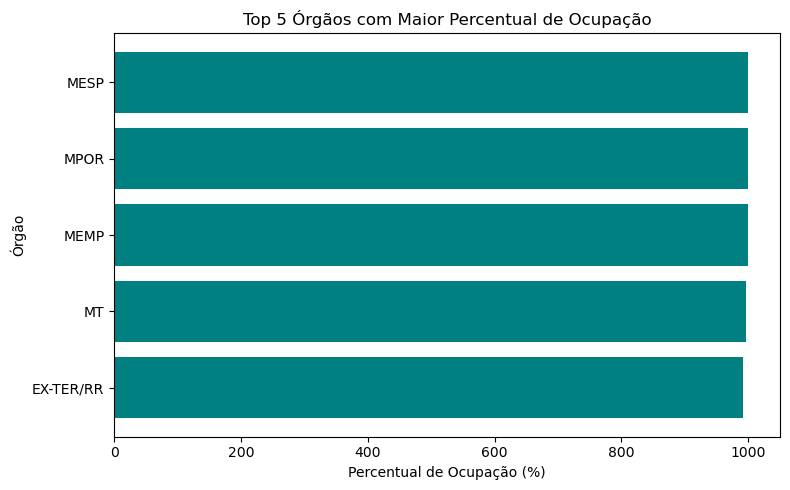

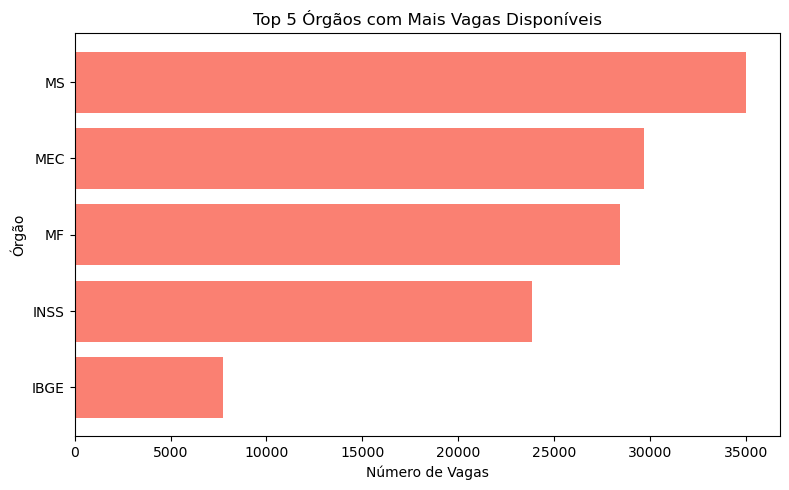

In [2]:
import matplotlib.pyplot as plt
file_path = 'tabela.xlsx'
df = pd.read_excel(file_path)
df['PERCENTUAL_OCUPACAO'] = (df['OCUPADA'] / df['APROVADA']) * 1000
df_sorted = df.sort_values(by='PERCENTUAL_OCUPACAO', ascending=False).head(5)
plt.figure(figsize=(8, 5))
plt.barh(df_sorted['SIGLA_ORGAO'], df_sorted['PERCENTUAL_OCUPACAO'], color='teal')
plt.xlabel('Percentual de Ocupação (%)')
plt.ylabel('Órgão')
plt.title('Top 5 Órgãos com Maior Percentual de Ocupação')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
df_vagas = df.sort_values(by='VAGA', ascending=False).head(5)
plt.figure(figsize=(8, 5))
plt.barh(df_vagas['SIGLA_ORGAO'], df_vagas['VAGA'], color='salmon')
plt.xlabel('Número de Vagas')
plt.ylabel('Órgão')
plt.title('Top 5 Órgãos com Mais Vagas Disponíveis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


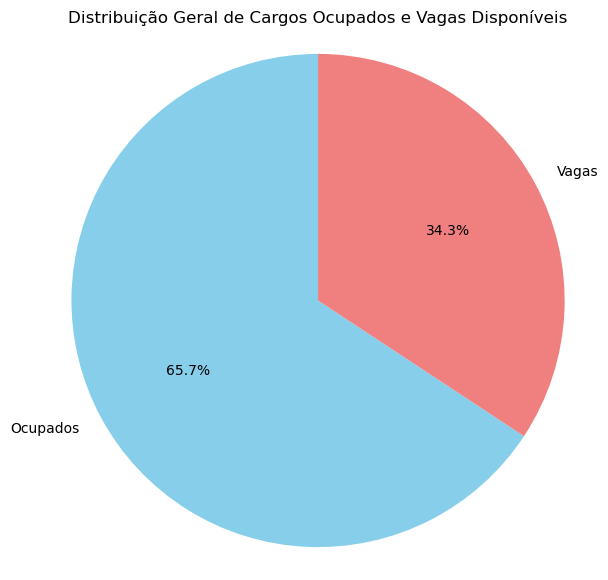

In [3]:
total_aprovada = df['APROVADA'].sum()
total_ocupada = df['OCUPADA'].sum()
total_vaga = df['VAGA'].sum()
labels = ['Ocupados', 'Vagas']
sizes = [total_ocupada, total_vaga]
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribuição Geral de Cargos Ocupados e Vagas Disponíveis')
plt.axis('equal') 
plt.show()


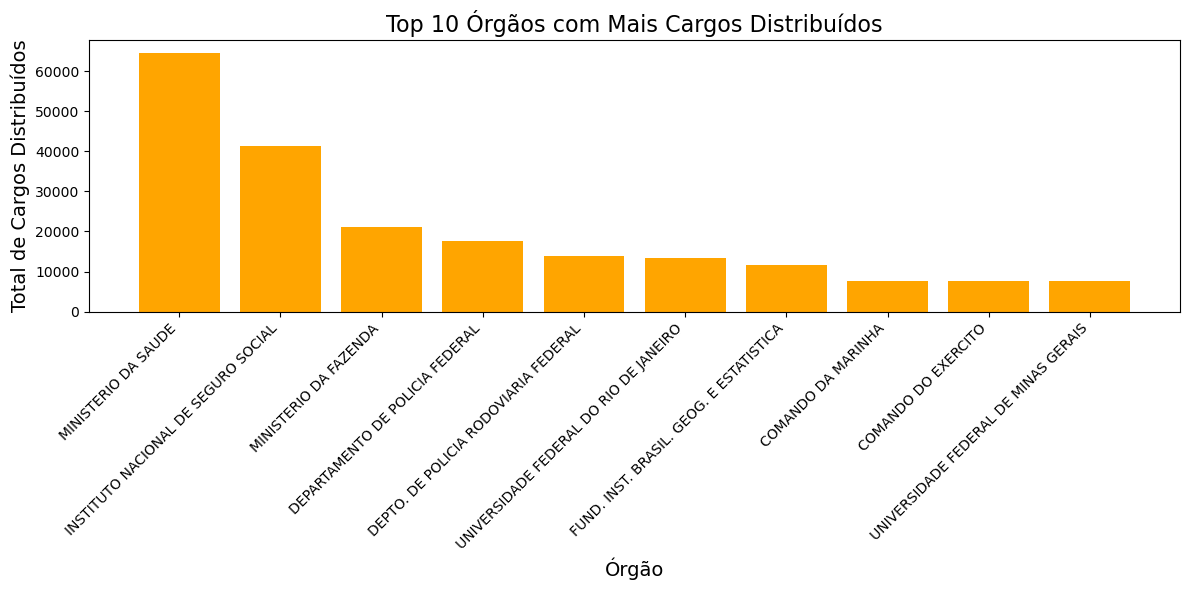

In [11]:
import matplotlib.pyplot as plt

# Agrupar por órgão (NOME_ORGAO) e somar a quantidade de cargos distribuídos (DISTRIBUIDA)
df_resumido_distribuidos = df_orgao.groupby('NOME_ORGAO')['DISTRIBUIDA'].sum().reset_index()

# Renomear as colunas para maior clareza
df_resumido_distribuidos.columns = ['Órgão', 'Total de Cargos Distribuídos']

# Ordenar pelos órgãos com mais cargos distribuídos e pegar os top 10
top_orgaos_distribuidos = df_resumido_distribuidos.sort_values(by='Total de Cargos Distribuídos', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_orgaos_distribuidos['Órgão'], top_orgaos_distribuidos['Total de Cargos Distribuídos'], color='orange')
plt.title('Top 10 Órgãos com Mais Cargos Distribuídos', fontsize=16)
plt.xlabel('Órgão', fontsize=14)
plt.ylabel('Total de Cargos Distribuídos', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


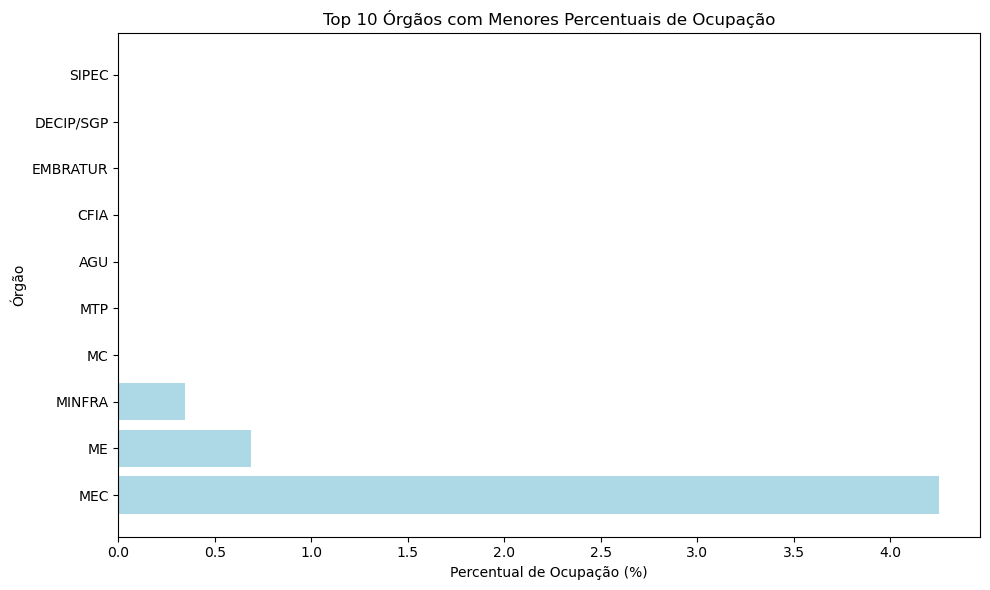

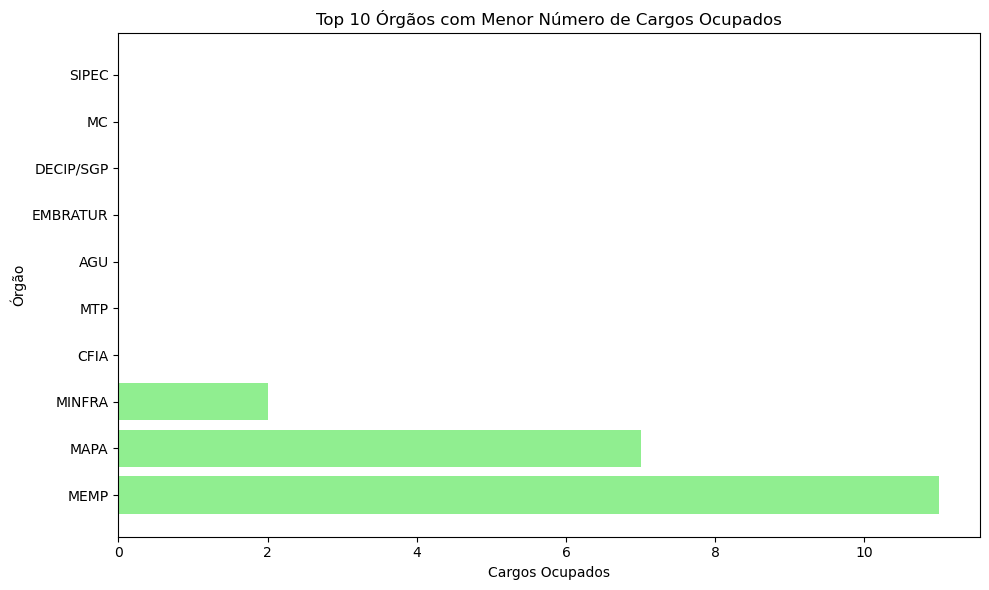

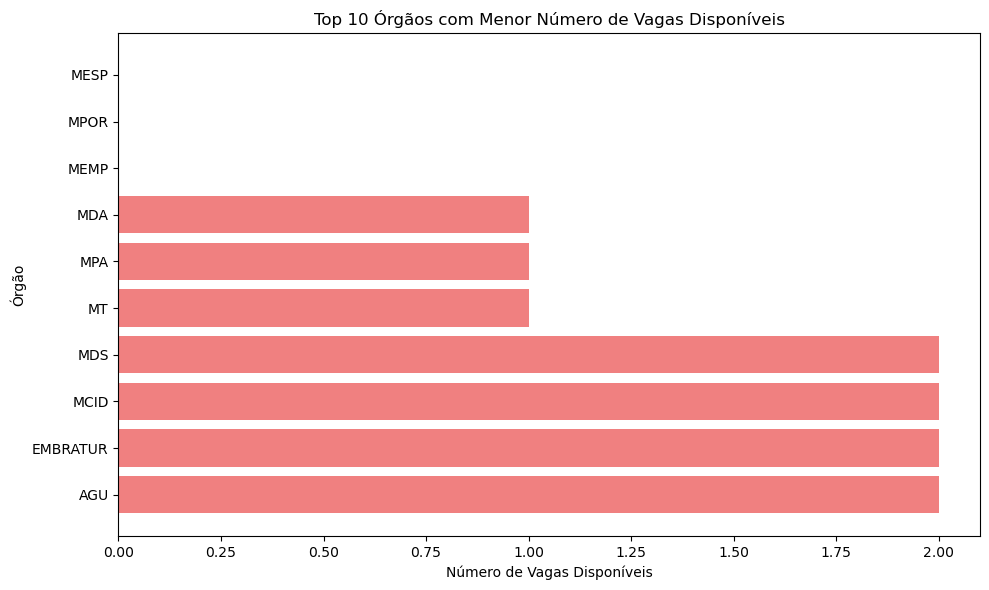

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo Excel (atualize o caminho para o seu arquivo)
file_path = 'tabela.xlsx'
df = pd.read_excel(file_path)

# Calcular o percentual de ocupação
df['PERCENTUAL_OCUPACAO'] = (df['OCUPADA'] / df['APROVADA']) * 100

# 1. Órgãos com menores percentuais de ocupação
df_lowest_percentual = df.sort_values(by='PERCENTUAL_OCUPACAO', ascending=True).head(10)

# 2. Órgãos com menor número de cargos ocupados
df_lowest_ocupada = df.sort_values(by='OCUPADA', ascending=True).head(10)

# 3. Órgãos com menor número de vagas disponíveis
df_lowest_vaga = df.sort_values(by='VAGA', ascending=True).head(10)

# Plot 1: Órgãos com menores percentuais de ocupação
plt.figure(figsize=(10, 6))
plt.barh(df_lowest_percentual['SIGLA_ORGAO'], df_lowest_percentual['PERCENTUAL_OCUPACAO'], color='lightblue')
plt.xlabel('Percentual de Ocupação (%)')
plt.ylabel('Órgão')
plt.title('Top 10 Órgãos com Menores Percentuais de Ocupação')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 2: Órgãos com menor número de cargos ocupados
plt.figure(figsize=(10, 6))
plt.barh(df_lowest_ocupada['SIGLA_ORGAO'], df_lowest_ocupada['OCUPADA'], color='lightgreen')
plt.xlabel('Cargos Ocupados')
plt.ylabel('Órgão')
plt.title('Top 10 Órgãos com Menor Número de Cargos Ocupados')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot 3: Órgãos com menor número de vagas disponíveis
plt.figure(figsize=(10, 6))
plt.barh(df_lowest_vaga['SIGLA_ORGAO'], df_lowest_vaga['VAGA'], color='lightcoral')
plt.xlabel('Número de Vagas Disponíveis')
plt.ylabel('Órgão')
plt.title('Top 10 Órgãos com Menor Número de Vagas Disponíveis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
